In [1]:
from seqsketch.utils.config import Config
from pathlib import Path
import ipynbname
import os
import torch
import matplotlib.pyplot as plt

os.chdir(
    "/Users/joergensen/Documents/AA_DTU/9.semester(KAIST)/Diffusion/cs492dCourseProject/"
)


configurator = Config(config_file="./seqsketch/configs/baseline.yaml")

dataloader = configurator.get_dataloader().train_dataloader()
model = configurator.get_model()

# load batch
X, C = model.prepare_batch(next(iter(dataloader)))

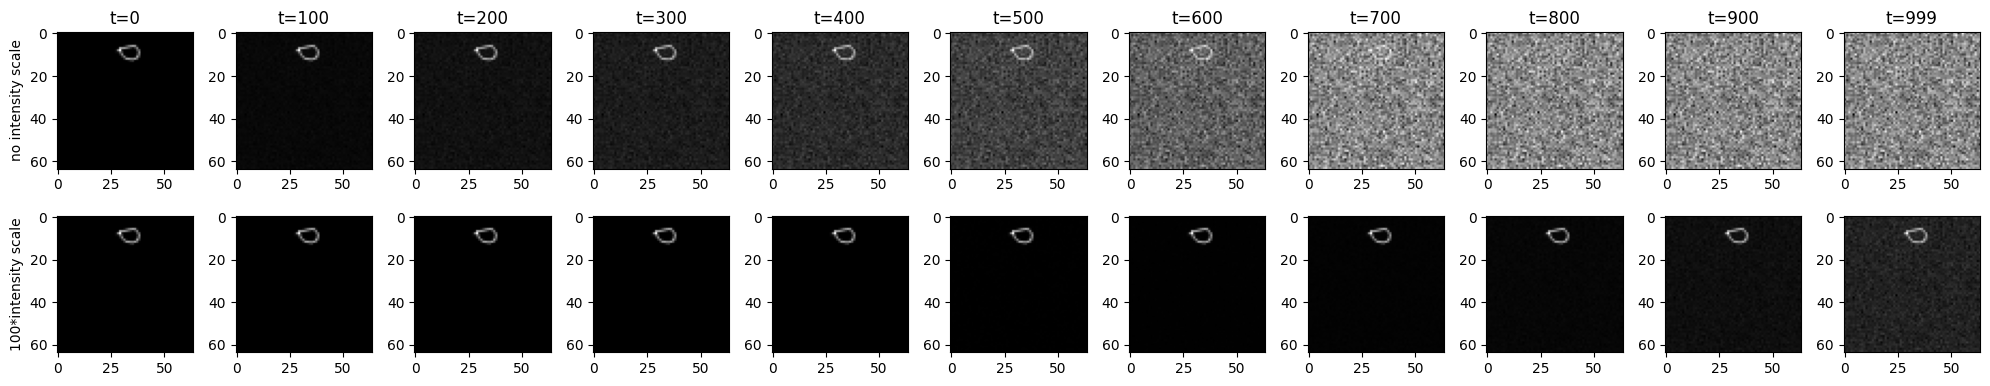

In [2]:
x0 = X[None, 0]  # select first sequence in batch and maintain batch dimension
x0_scaled = x0 * 100
x0_combined = torch.cat([x0, x0_scaled], dim=0)
eps = torch.randn_like(x0)

fig, ax = plt.subplots(2, 11, figsize=(20, 4))
timesteps = torch.tensor(
    model.scheduler.timesteps.tolist()[::-100] + [model.scheduler.timesteps[0]]
)

for i, t in enumerate(timesteps):
    xt = model.scheduler.add_noise(x0_combined, eps, t) if t > 0 else x0_combined
    for j in range(2):
        ax[j, i].imshow(xt[j].squeeze().detach().cpu().numpy(), cmap="gray")
        # ax[j, i].axis("off")
    ax[0, i].set_title(f"t={t}")
ax[0, 0].set_ylabel("no intensity scale")
ax[1, 0].set_ylabel("100*intensity scale")
plt.tight_layout()

In [81]:
x0_scaled.max()

tensor(11.7647)

In [ ]:
with torch.no_grad():
    x, c = X[0], C[0]
    eps = torch.randn_like(x)